# Notebook 3: Exploring Resonance

This notebook is intended for use within Google Colab.

Using the skills from the previous notebook, this notebook will explore the concept of resonance in a circuit using phasors and their corresponding waveforms.

Resonance occurs when the inductor reactance and the capacitor reactances are equal. This is because the phase that is offset by these two components will effectively cancel out! This will also be a great way to check if your code works. If everything is plotted correctly, your resistor's voltage, circuit current, and your supply voltage should be **in phase**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Concept 1: Representing a circuit at resonance with phasors

Let's see an example of an RLC to start with:

A RLC circuit consists of a 1.5$\Omega$ resistor, 0.1H inductor, and 0.5F capacitor. The current of the circuit is 2A. We will assume the frequency is 1Hz. It may be overwhelming to do all of this in one big step, so lets break it down! First, lets begin with our known values. We will use 45$^{\circ}$ as the default angle for the resistor and current just because it's easier to see.

In [ ]:
# Known values
R = 1.5
L = 0.1
C = 0.5
I = 2
f = 0.5

# Angles
Rtheta = 45
Ltheta = Rtheta + 90 # Leading!
Ctheta = Rtheta - 90 # Lagging!

# Changing them to radians
rad_r = np.radians(Rtheta)
rad_l = np.radians(Ltheta)
rad_c = np.radians(Ctheta)
rad_I = np.radians(Rtheta)

# Reactances
Xl = 2*np.pi*f*L
Xc = 1/(2*np.pi*f*C)

# Voltages. These will be our magnitudes
Vr = I*R
Vl = I*Xl
Vc = I*Xc


All the values that we can easily calculate are now all listed. Now, lets consider the parameters that the phasors will need.

We know that they all need to begin at (0,0), and will all need their respective x and y velocities. This means we will need their magnitudes in the sine and cosine directions. Then, we can use the **ax.quiver** function to plot the phasors!

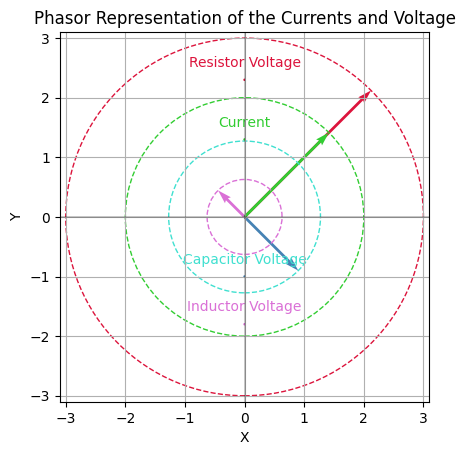

In [ ]:
# Phasor parameters
xr = Vr * np.cos(rad_r)
yr = Vr * np.sin(rad_r)

xl = Vl * np.cos(rad_l)
yl = Vl * np.sin(rad_l)

xc = Vc * np.cos(rad_c)
yc = Vc * np.sin(rad_c)

xi = I * np.cos(rad_I)
yi = I * np.sin(rad_I)

fig, ax = plt.subplots()

# Phasors

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4)
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4)
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4)
QI = ax.quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4)

# Circles

circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Supply voltage
ax.add_artist(circle_i)

ax.set_aspect('equal')
ax.set_xlim(-3.1, 3.1)
ax.set_ylim(-3.1, 3.1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.3)
plt.axvline(0, color='black',linewidth=0.3)
plt.quiverkey(Qr, 0, 2.3, 0.5, 'Resistor Voltage', coordinates='data', labelcolor ='crimson')
plt.quiverkey(Ql, 0, -1.8, 0.5, 'Inductor Voltage', coordinates='data', labelcolor ='orchid')
plt.quiverkey(Qc, 0, -1, 0.5, 'Capacitor Voltage', coordinates='data', labelcolor ='turquoise')
plt.quiverkey(QI, 0, 1.3, 0.5, 'Current', coordinates='data', labelcolor ='limegreen')
plt.show()

By looking at the phasors, we can already tell that there is going to be some sort of lagging of either the current or the voltage, just from the sizes of the phasors alone. There is however, a way to change the phase that the phasors is lagged/lead. To do this, we can change the frequency of the supply.

---

**Task 1**

Change the frequency to 2Hz, and 0.5Hz. Comment on the magnitudes of the respective phasors and what that implies for the resultant phasor.

<font color='steelblue'>Frequency determines the size of the phasors. As frequency increases, the inductor phasor grows and the capacitor phasor shrinks. If the frequency decreases, the capacitor phasor grows and the inductor phasor shrinks. This means that the resultant phasor will usually be leading the current at high frequencies, and lagging behind the current at low frequencies.</font>

Now let's actually plot the resultant phasor and see what happens. We'll use the same example from above.

/usr/local/lib/python3.11/dist-packages/matplotlib/quiver.py:648: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


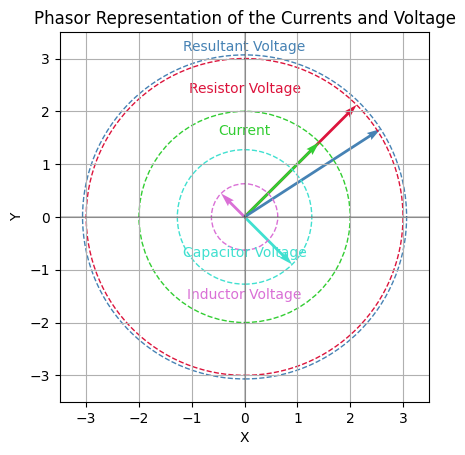

In [ ]:
fig, ax = plt.subplots()

# Phasors

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
QI = ax.quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4) # Current
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc , angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resultant

# Resultant magnitude from a^2 + b^2 = c^2

magR = np.sqrt(Vr**2+(Vl-Vc)**2)

# Circles

circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Supply voltage
ax.add_artist(circle_i)
circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.3)
plt.axvline(0, color='black',linewidth=0.3)
plt.quiverkey(Qr, 0, 2.1, 0.5, 'Resistor Voltage', coordinates='data', labelcolor ='crimson')
plt.quiverkey(Ql, 0, -1.8, 0.5, 'Inductor Voltage', coordinates='data', labelcolor ='orchid')
plt.quiverkey(Qc, 0, -1, 0.5, 'Capacitor Voltage', coordinates='data', labelcolor ='turquoise')
plt.quiverkey(QI, 0, 1.3, 0.5, 'Current', coordinates='data', labelcolor ='limegreen')
plt.quiverkey(QR, 0, 2.9, 0.5, 'Resultant Voltage', coordinates='data', labelcolor ='steelblue')
plt.show()

Now that we can see the resultant voltage, let's actually see the physical phase change itself! The waves will also be shown so you can clearly see how the phase changes affect the circuit. Pay close attention to the x-axis- note that the time axis is scaled differently for each graph! This is intended to make the outputs look similar, allowing you to compare the relative amplitudes. Each graph is labeled with its corresponding frequency.

Also note that the current is plotted as well. You can ignore the units, as this is just to observe the phase relationship with the resistor. You can also observe how the current's period changes with each frequency!

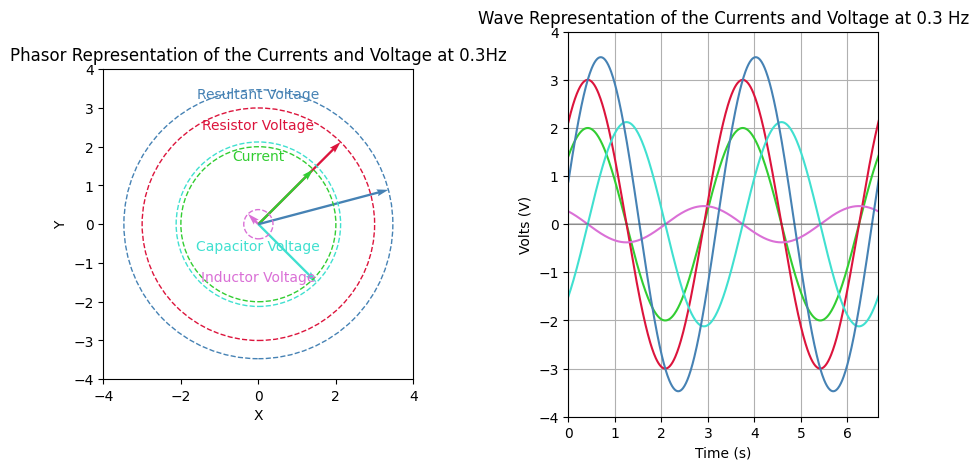

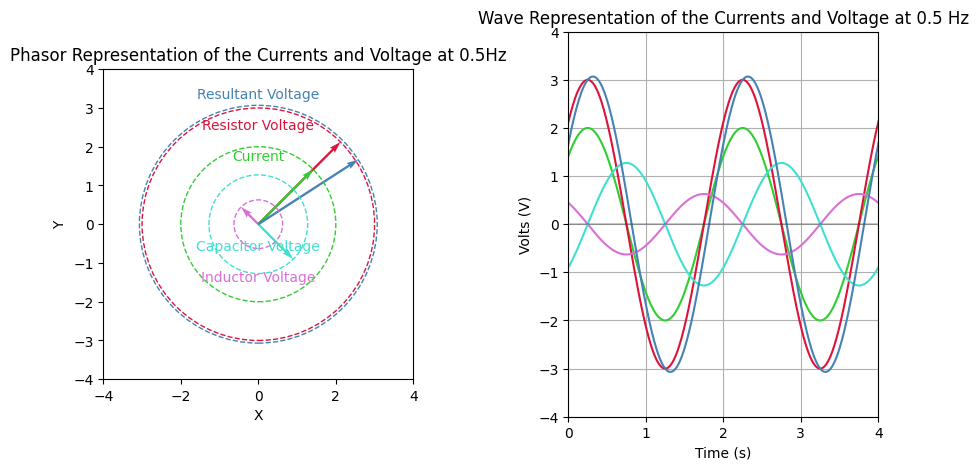

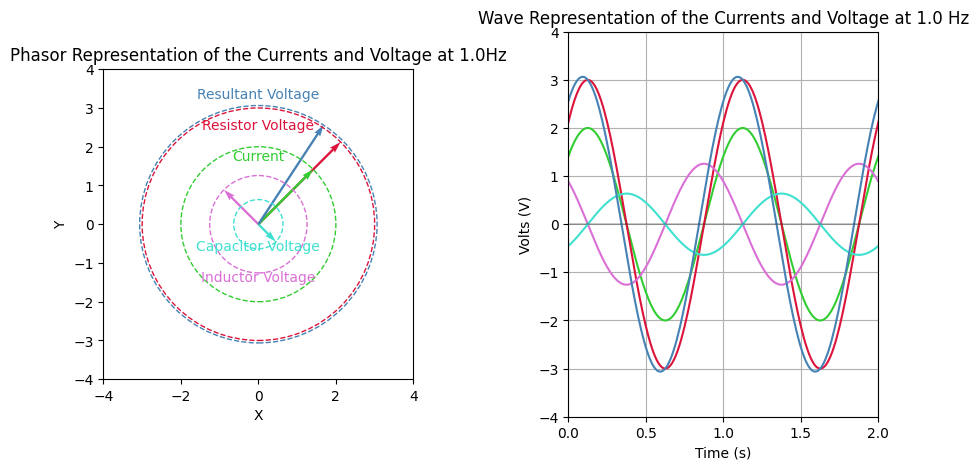

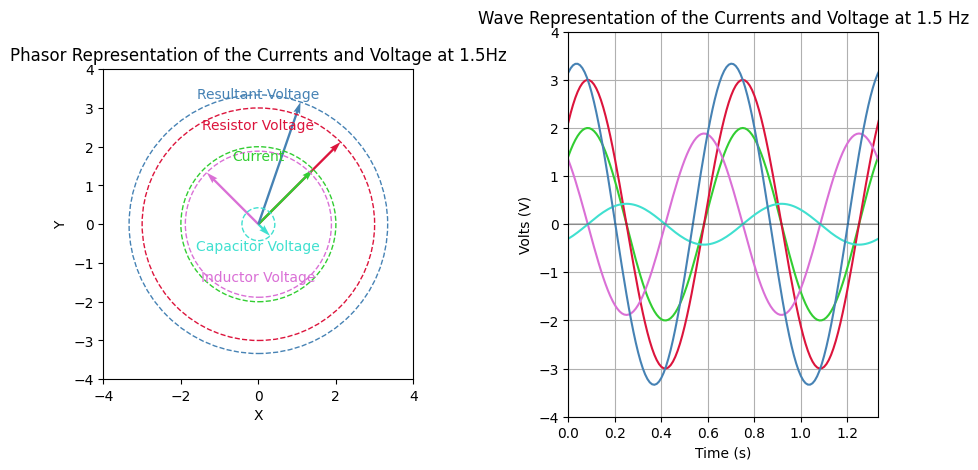

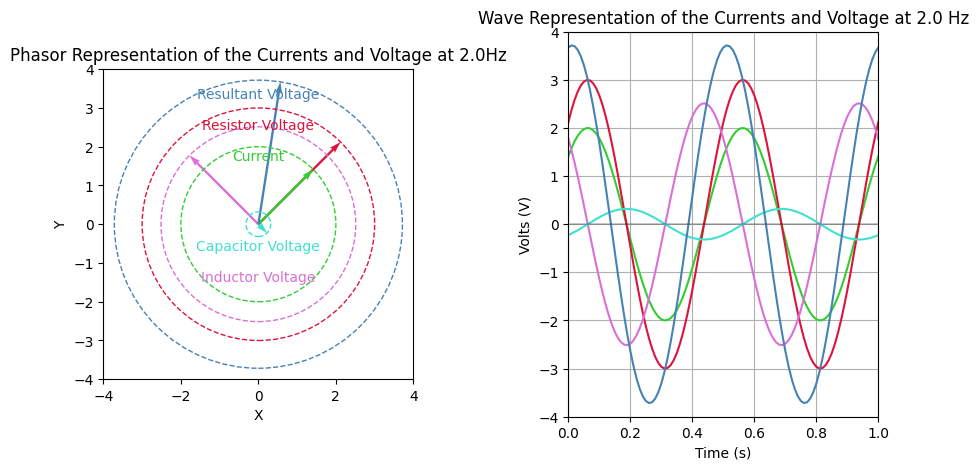

In [ ]:
f_array = np.array([0.3, 0.5, 1, 1.5, 2])
t = np.linspace(0, 10, 1000, endpoint=False) # Time array!

for f in f_array:# We want to use a loop to see the affects for every single value in the array
  # Reactances
  Xl = 2*np.pi*f*L
  Xc = 1/(2*np.pi*f*C)

  # Voltages
  Vl = I*Xl
  Vc = I*Xc

  # X and Y
  xr = Vr * np.cos(rad_r)
  yr = Vr * np.sin(rad_r)

  xl = Vl * np.cos(rad_l)
  yl = Vl * np.sin(rad_l)

  xc = Vc * np.cos(rad_c)
  yc = Vc * np.sin(rad_c)

  xi = I * np.cos(rad_I)
  yi = I * np.sin(rad_I)

  fig, axs = plt.subplots(1, 2, figsize=(10, 5))

  # Phasors

  Qr = axs[0].quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
  Ql = axs[0].quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
  Qc = axs[0].quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
  QI = axs[0].quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4) # Current
  QR = axs[0].quiver(0, 0, xr+xl+xc, yr+yl+yc , angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resultant

  # Resultant magnitude from a^2 + b^2 = c^2

  magR = np.sqrt(Vr**2+(Vl-Vc)**2)
  radR = np.arctan2(Xl-Xc, R) + rad_r # Adding the resistor phase since it's technically a right triangle offset by that phase!

  # Circles

  circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
  axs[0].add_artist(circle_r)
  circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
  axs[0].add_artist(circle_l)
  circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
  axs[0].add_artist(circle_c)
  circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Supply voltage
  axs[0].add_artist(circle_i)
  circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
  axs[0].add_artist(circle_R)

  axs[0].set_aspect('equal')
  axs[0].set_xlim(-4, 4)
  axs[0].set_ylim(-4, 4)
  axs[0].set_xlabel('X')
  axs[0].set_ylabel('Y')
  axs[0].set_title(f'Phasor Representation of the Currents and Voltage at {f}Hz')

  # Waves
  current = I * np.sin(2*np.pi*f*t + rad_r)
  voltager = Vr * np.sin(2*np.pi*f*t + rad_r)
  voltagel = Vl * np.sin(2*np.pi*f*t + rad_l)
  voltagec = Vc * np.sin(2*np.pi*f*t + rad_c)
  voltageR = magR * np.sin(2*np.pi*f*t + radR)

  axs[1].plot(t, current, color='limegreen')
  axs[1].set_title("Current waveform vs Time")
  axs[1].set_ylabel("Current (A)")
  axs[1].set_xlabel("Time (s)")

  axs[1].plot(t, voltager, color='crimson')
  axs[1].set_title("Resistor Voltage waveform vs Time")
  axs[1].set_ylabel("Voltage (V)")
  axs[1].set_xlabel("Time (s)")

  axs[1].plot(t, voltagel, color='orchid')
  axs[1].set_title("Inductor Voltage waveform vs Time")
  axs[1].set_ylabel("Voltage (V)")
  axs[1].set_xlabel("Time (s)")

  axs[1].plot(t, voltagec, color='turquoise')
  axs[1].set_title("Capacitor Voltage waveform vs Time")
  axs[1].set_ylabel("Voltage (V)")
  axs[1].set_xlabel("Time (s)")

  axs[1].plot(t, voltageR, color='steelblue')
  axs[1].set_title("Resultant Voltage waveform vs Time")
  axs[1].set_ylabel("Voltage (V)")
  axs[1].set_xlabel("Time (s)")
  axs[1].set_xlim(0, 2/f) # Divided by f so that we can see the full waves for every single plot! Otherwise it would be disproportionate if we gave a fixed value.
  axs[1].set_ylim(-4, 4)
  axs[1].set_xlabel('Time (s)')
  axs[1].set_ylabel('Volts (V)')
  axs[1].set_title(f'Wave Representation of the Currents and Voltage at {f} Hz')


  plt.grid(True)
  plt.axhline(0, color='black',linewidth=0.3)
  plt.axvline(0, color='black',linewidth=0.3)
  plt.quiverkey(Qr, 0, 2.1, 0.5, 'Resistor Voltage', coordinates='data', labelcolor ='crimson')
  plt.quiverkey(Ql, 0, -1.8, 0.5, 'Inductor Voltage', coordinates='data', labelcolor ='orchid')
  plt.quiverkey(Qc, 0, -1, 0.5, 'Capacitor Voltage', coordinates='data', labelcolor ='turquoise')
  plt.quiverkey(QI, 0, 1.3, 0.5, 'Current', coordinates='data', labelcolor ='limegreen')
  plt.quiverkey(QR, 0, 2.9, 0.5, 'Resultant Voltage', coordinates='data', labelcolor ='steelblue')
  plt.subplots_adjust(wspace=0.5)

plt.show() # At the end so it shows EVERY single plot

All of the code within the loop **must** be there as we need to update the values in every iteration! This is why the inductor and capacitor reactances and voltages are in the <font color='hotpink'>for</font> loop, whereas the resistor voltage is not. The resultant phasor, of course, will also be in the <font color='hotpink'>for</font> loop because it's affected by the inductor's and capacitor's reactance values.

Now we want to find the value of $f$ that gives us our **resonant frequency**.

Just by looking at the examples above, we can see that the waves and the phasors are going to be in phase $ 0.5Hz < f < 1Hz$. To get an exact value, we can calculate it by rearranging the respective reactance formulas.

---
**Task 2**

Rearrange the reactance formulas to get an answer for $f$ where the voltage over the supply will be *in phase*. Show your working below or rearrange the formula on a piece of paper! Some parts have been started for you in LaTeX.

$$ X_L = X_C$$
$$2*\pi*f*L = \frac{1}{2*\pi*f*C}$$
$$4*\pi^2*f^2 = \frac{1}{L*C} $$
$$f^2 = \frac{1}{L*C*4*\pi^2} $$
$$f = \sqrt{\frac{1}{L*C*4*\pi^2}}$$

After finishing the above equation, insert it into the code cell below and check to see if reasonable.

/usr/local/lib/python3.11/dist-packages/matplotlib/quiver.py:648: RuntimeWarning: invalid value encountered in divide
  lengths = np.hypot(*dxy.T) / eps


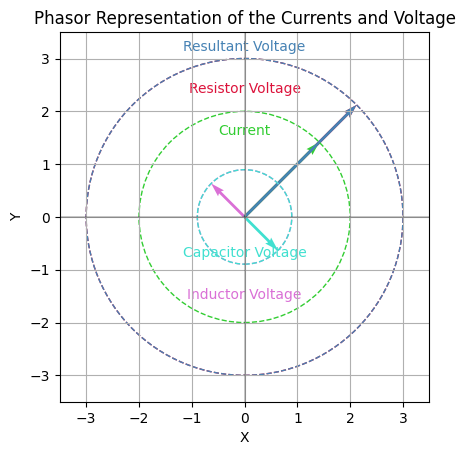

In [ ]:
f = np.sqrt(1/(L*C*4*np.pi**2))
Xl = 2*np.pi*f*L
Xc = 1/(2*np.pi*f*C)

# Voltages
Vl = I*Xl
Vc = I*Xc

# X and Y
xr = Vr * np.cos(rad_r)
yr = Vr * np.sin(rad_r)

xl = Vl * np.cos(rad_l)
yl = Vl * np.sin(rad_l)

xc = Vc * np.cos(rad_c)
yc = Vc * np.sin(rad_c)

xi = I * np.cos(rad_I)
yi = I * np.sin(rad_I)

fig, ax = plt.subplots()

# Phasors

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
QI = ax.quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4) # Current
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc , angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resultant

# Resultant magnitude from a^2 + b^2 = c^2

magR = np.sqrt(Vr**2+(Vl-Vc)**2)

# Circles

circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Supply voltage
ax.add_artist(circle_i)
circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')

plt.grid(True)
plt.axhline(0, color='black',linewidth=0.3)
plt.axvline(0, color='black',linewidth=0.3)
plt.quiverkey(Qr, 0, 2.1, 0.5, 'Resistor Voltage', coordinates='data', labelcolor ='crimson')
plt.quiverkey(Ql, 0, -1.8, 0.5, 'Inductor Voltage', coordinates='data', labelcolor ='orchid')
plt.quiverkey(Qc, 0, -1, 0.5, 'Capacitor Voltage', coordinates='data', labelcolor ='turquoise')
plt.quiverkey(QI, 0, 1.3, 0.5, 'Current', coordinates='data', labelcolor ='limegreen')
plt.quiverkey(QR, 0, 2.9, 0.5, 'Resultant Voltage', coordinates='data', labelcolor ='steelblue')
plt.show()

Now, it's your turn! Using the above example as a guideline, finish the task below.

---
**Task 3**

A RLC circuit with a current of 1A has a resistor, inductor, and capacitor in series. The resistor has a resistance of 3$\Omega$, the inductor has an inductance of 0.5H, and the capacitor has a capacitance of 0.2F. Assume that the frequency is 3Hz.

a) Calculate the reactances of the inductor and capacitor.

b) Using code from above, plot the phasors of the voltages over the resistor, capacitor, and the inductor. Then plot the current phasor.

c) Plot the resultant phasor on the same circle using pythagoras and trigonometric rules.

d) Plot the respective waveforms associated with each phasor using subplots like in notebook 2.

e) Find the resonant frequency and plot the resultant phasor again. Then, replot the resultant waveform and waveform of the resistor phasor. Justify whether or not your resultant phasor and waveform is correct.

In [ ]:
# a
I = 1 # fill these in!
R = 3
L = 0.5
C = 0.2
f = 3

# degrees
res_angle = 0
inductor_angle = res_angle + 90
capacitor_angle = res_angle - 90

# radians

rad_res = np.radians(res_angle)
rad_inductor = np.radians(inductor_angle)
rad_capacitor = np.radians(capacitor_angle)

Xl = 2*np.pi*f*L
Xc = 1/(2*np.pi*f*C)

print(Xl, 'Ohms')
print(Xc, 'Ohms')

9.42477796076938 Ohms
0.2652582384864922 Ohms


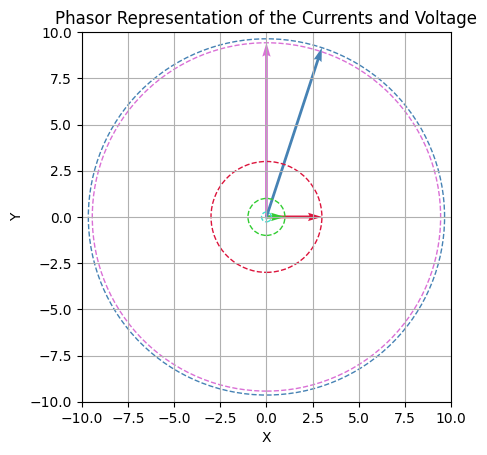

In [ ]:
# b (Copy paste it in and adjust the variables!)
Vr = I * R
Vl = I * Xl
Vc = I * Xc

# Phasor parameters
xr = Vr * np.cos(rad_res)
yr = Vr * np.sin(rad_res)

xl = Vl * np.cos(rad_inductor)
yl = Vl * np.sin(rad_inductor)

xc = Vc * np.cos(rad_capacitor)
yc = Vc * np.sin(rad_capacitor)

xi = I * np.cos(rad_res)
yi = I * np.sin(rad_res)

fig, ax = plt.subplots()

# Phasors

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4)
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4)
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4)
QI = ax.quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4)
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc, angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4)

resultant_magnitude = np.sqrt(Vr**2 + (Vl-Vc)**2)

# Circles

circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_i)
circle_R = plt.Circle((0, 0), resultant_magnitude, color='steelblue', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')
ax.grid(True)

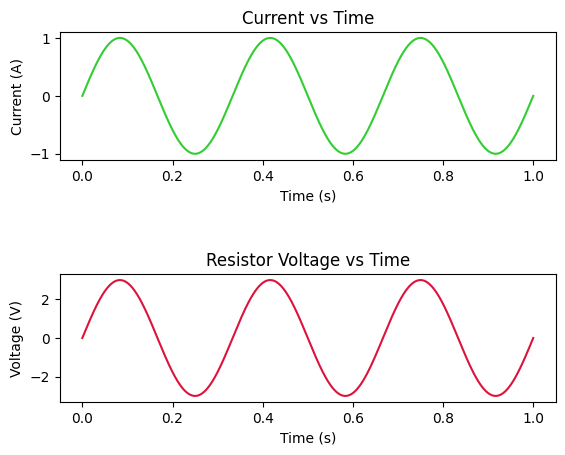

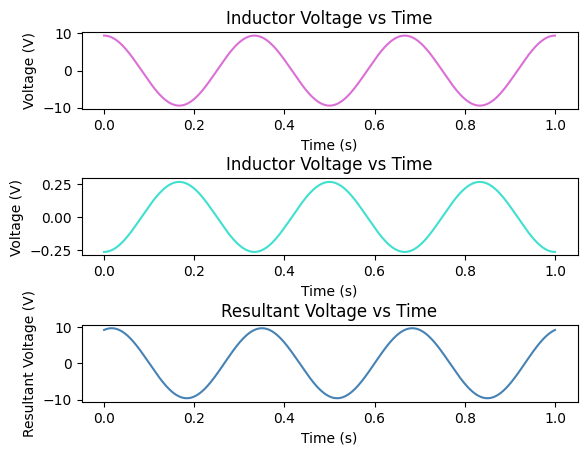

In [ ]:
# d

t = np.linspace(0, 1, 1000)

# list the different waves here

wave_current = I * np.sin(2*np.pi*f*t + rad_res)
wave_resistor = Vr * np.sin(2*np.pi*f*t + rad_res)
wave_inductor = Vl * np.sin(2*np.pi*f*t + rad_inductor)
wave_capacitor = Vc * np.sin(2*np.pi*f*t + rad_capacitor)

wave_resultant = wave_resistor + wave_inductor + wave_capacitor

# The composite plots cannot clearly show all 5 plots, so you will need to break it up into a group of 2 and 3! It doesn't matter which one is where, this is just so you can clearly see the waveforms and their labels.
composite_plot, (Current ,Resistor_Voltage ) = plt.subplots(2)

# Current Voltage waveform
Current.plot(t, wave_current ,  color='limegreen')
Current.set_title("Current vs Time")
Current.set_ylabel("Current (A)")
Current.set_xlabel("Time (s)")

# Resistor Voltage waveform
Resistor_Voltage.plot(t, wave_resistor ,  color='crimson')
Resistor_Voltage.set_title("Resistor Voltage vs Time")
Resistor_Voltage.set_ylabel("Voltage (V)")
Resistor_Voltage.set_xlabel("Time (s)")


composite_plot.subplots_adjust(hspace=0.9)

composite_plot, (Inductor_Voltage, Capacitor_Voltage, Resultant_Voltage ) = plt.subplots(3)

# Inductor Voltage waveform
Inductor_Voltage.plot( t, wave_inductor , color='orchid')
Inductor_Voltage.set_title("Inductor Voltage vs Time")
Inductor_Voltage.set_ylabel("Voltage (V)")
Inductor_Voltage.set_xlabel("Time (s)")

# Inductor Voltage waveform
Capacitor_Voltage.plot( t, wave_capacitor , color='turquoise')
Capacitor_Voltage.set_title("Inductor Voltage vs Time")
Capacitor_Voltage.set_ylabel("Voltage (V)")
Capacitor_Voltage.set_xlabel("Time (s)")

# Resultant waveform
Resultant_Voltage.plot( t, wave_resultant ,  color='steelblue')
Resultant_Voltage.set_title("Resultant Voltage vs Time")
Resultant_Voltage.set_ylabel("Resultant Voltage (V)")
Resultant_Voltage.set_xlabel("Time (s)")


composite_plot.subplots_adjust(hspace=0.9)


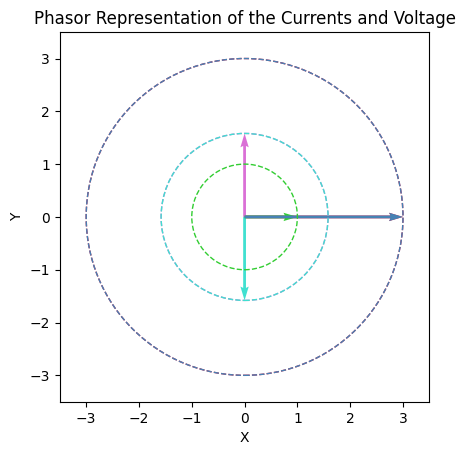

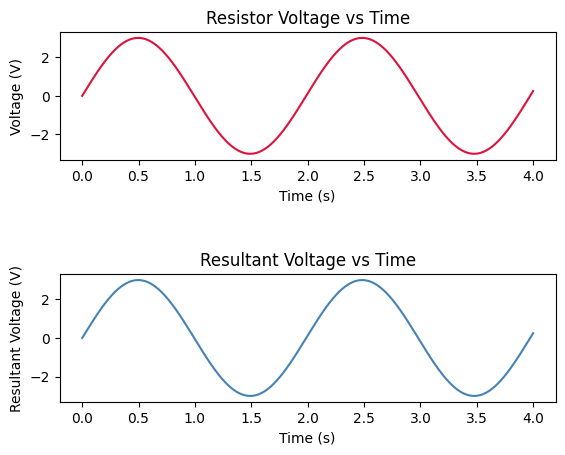

In [ ]:
# e

f = np.sqrt(1/(L*C*4*np.pi**2))

Xl = 2*np.pi*f*L
Xc = 1/(2*np.pi*f*C)

# Voltages
Vl = I*Xl
Vc = I*Xc

# X and Y

xl = Vl * np.cos(rad_inductor)
yl = Vl * np.sin(rad_inductor)

xc = Vc * np.cos(rad_capacitor)
yc = Vc * np.sin(rad_capacitor)

fig, ax = plt.subplots()

# Phasors

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
QI = ax.quiver(0, 0, xi, yi, angles='xy', scale_units='xy', scale=1, color='limegreen', linewidth=4) # Current
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc , angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resultant

# Resultant magnitude from a^2 + b^2 = c^2

magnitude_resultant = np.sqrt(Vr**2+(Vl-Vc)**2)
radians_resultant = np.arctan((Vl-Vc)/Vr)

# Circles

circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_i = plt.Circle((0, 0), I, color='limegreen', fill=False, linestyle='--') # Supply voltage
ax.add_artist(circle_i)
circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-3.5, 3.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')

t = np.linspace(0, 4, 10000)

wave_resistor = Vr * np.sin(2*np.pi*f*t + rad_res)
wave_resultant = magnitude_resultant*np.sin(2*np.pi*f*t + radians_resultant)

composite_plot, (Resistor_Voltage, Resultant_Voltage ) = plt.subplots(2)

# Resistor Voltage waveform
Resistor_Voltage.plot(t, wave_resistor , color='crimson')
Resistor_Voltage.set_title("Resistor Voltage vs Time")
Resistor_Voltage.set_ylabel("Voltage (V)")
Resistor_Voltage.set_xlabel("Time (s)")

# Resultant waveform
Resultant_Voltage.plot( t, wave_resultant , color='steelblue')
Resultant_Voltage.set_title("Resultant Voltage vs Time")
Resultant_Voltage.set_ylabel("Resultant Voltage (V)")
Resultant_Voltage.set_xlabel("Time (s)")

composite_plot.subplots_adjust(hspace=0.9)


# Extension 1: Above and below resonance

Now that we know what a circuit at resonance is like, let's talk about the other two cases that we get from the lagging and leading impedances.


If $\omega > \omega_0$ (angular frequency is greater than resonant angular frequency), the phase of the circuit is *positive*. The circuit is performing *above* resonance, and is considered **inductive**.  

If $\omega < \omega_0$ (angular frequency is less than resonant angular frequency), the phase of the circuit is *negative*. The circuit is performing *below* resonance, and is considered **capacitive**.

---
**Task 4**

A RLC circuit consists of a 4$\Omega$ resistor, 0.2H inductor, and 100$\mu$F capacitor. It operates at the mains frequency of 50Hz, and has a current of 2A.

a) Using these variables, deduce whether or not the circuit is inductive or capacitive.

b) Plot the voltage phasors for the resistor, inductor, capacitor, and supply. Then, plot the corresponding waveforms.

c) Find the resonant frequency of this circuit.

d) Find the values of $f$ where the circuit's supply voltage is 45$^{\circ}$ ahead of the current, and 45$^{\circ}$ lagged behind the current. Hint: Use your knowledge of trig rules or the code from above to figure this out. You may want to rearrange the formulas on a sheet of paper.

In [ ]:
# a
R = 4
L = 0.2
C = 100*10**(-6)
f = 50
I = 2

Xc = 1/(2*np.pi*f*C)
Xl = 2*np.pi*f*L

print(Xc)
print(Xl)

# Type here!

# This circuit is inductive


31.830988618379074
62.83185307179587


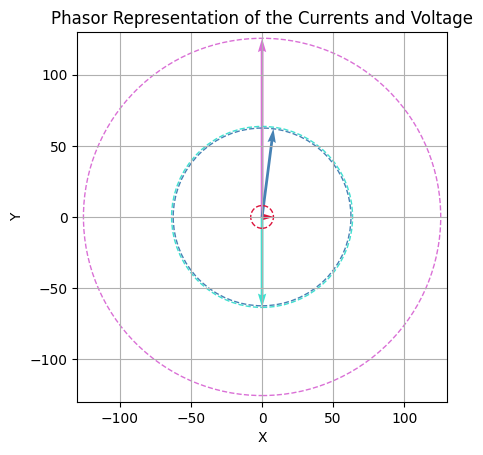

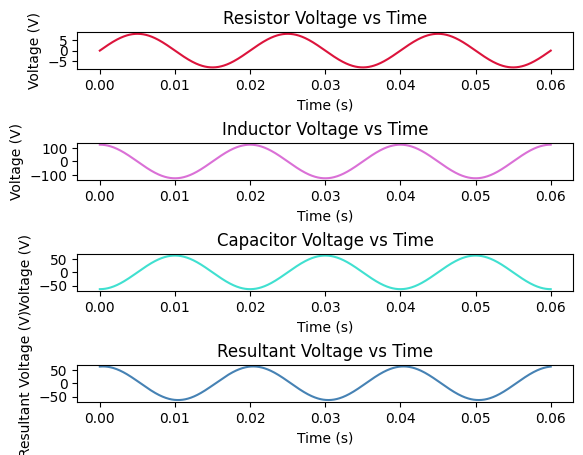

In [ ]:
# b
Vr = I * R
Vc = I * Xc
Vl = I * Xl

r_angle = 0
l_angle = r_angle + 90
c_angle = r_angle - 90

r_rad = np.radians(r_angle)
l_rad = np.radians(l_angle)
c_rad = np.radians(c_angle)

# x and y

xr = Vr * np.cos(r_rad)
yr = Vr * np.sin(r_rad)

xl = Vl * np.cos(l_rad)
yl = Vl * np.sin(l_rad)

xc = Vc * np.cos(c_rad)
yc = Vc * np.sin(c_rad)

# Phasors

fig, ax = plt.subplots()

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc, angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resistor

magR = np.sqrt(Vr**2+(Vl-Vc)**2)

# Circles
circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-130, 130)
ax.set_ylim(-130, 130)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')


# time array

t = np.linspace(0, 0.06, 1000)
R_phase = np.arctan((Vl-Vc)/Vr)

# Waves
wave_res = Vr*np.sin(2*np.pi*f*t + r_rad)
wave_l = Vl*np.sin(2*np.pi*f*t + l_rad)
wave_c = Vc*np.sin(2*np.pi*f*t + c_rad)
wave_R = magR*np.sin(2*np.pi*f*t + R_phase)

composite_plot, (Resistor_Voltage, Inductor_Voltage, Capacitor_Voltage, Resultant_Voltage ) = plt.subplots(4)

# Resistor Voltage waveform
Resistor_Voltage.plot(t, wave_res, color='crimson')
Resistor_Voltage.set_title("Resistor Voltage vs Time")
Resistor_Voltage.set_ylabel("Voltage (V)")
Resistor_Voltage.set_xlabel("Time (s)")

# Inductor Voltage waveform
Inductor_Voltage.plot(t, wave_l, color='orchid')
Inductor_Voltage.set_title("Inductor Voltage vs Time")
Inductor_Voltage.set_ylabel("Voltage (V)")
Inductor_Voltage.set_xlabel("Time (s)")

# Capacitor Voltage waveform
Capacitor_Voltage.plot(t, wave_c, color='turquoise')
Capacitor_Voltage.set_title("Capacitor Voltage vs Time")
Capacitor_Voltage.set_ylabel("Voltage (V)")
Capacitor_Voltage.set_xlabel("Time (s)")

# Resultant waveform
Resultant_Voltage.plot( t, wave_R , color='steelblue')
Resultant_Voltage.set_title("Resultant Voltage vs Time")
Resultant_Voltage.set_ylabel("Resultant Voltage (V)")
Resultant_Voltage.set_xlabel("Time (s)")

composite_plot.subplots_adjust(hspace=2)

In [ ]:
# c
f = np.sqrt(1/(L*C*4*np.pi**2))

print(f, 'Hz')



35.588127170858854 Hz


37.21524695265693
-45.00000000000005
34.03214809081903


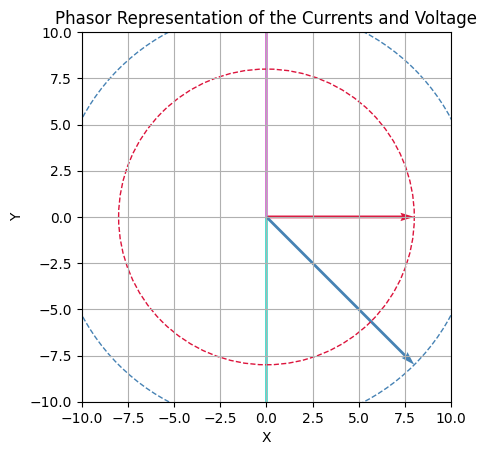

In [ ]:
# d

R_phase = 0 # this is in degrees!
Inductive_phase = 45
Capacitive_phase = -45

rad_in = np.radians(Inductive_phase)
rad_cap = np.radians(Capacitive_phase)

# Inductive
f = (8*np.tan(rad_in)+np.sqrt(8**2+16*L/C))/(8*np.pi*L)

print(f)

Xl = 2*np.pi*fc*L
Xc = 1/(2*np.pi*fc*C)

Vc = I * Xc
Vl = I * Xl

r_angle = 0
l_angle = r_angle + 90
c_angle = r_angle - 90

r_rad = np.radians(r_angle)
l_rad = np.radians(l_angle)
c_rad = np.radians(c_angle)

# x and y

xl = Vl * np.cos(l_rad)
yl = Vl * np.sin(l_rad)

xc = Vc * np.cos(c_rad)
yc = Vc * np.sin(c_rad)

# Phasors

fig, ax = plt.subplots()

Qr = ax.quiver(0, 0, xr, yr, angles='xy', scale_units='xy', scale=1, color='crimson', linewidth=4) # Resistor
Ql = ax.quiver(0, 0, xl, yl, angles='xy', scale_units='xy', scale=1, color='orchid', linewidth=4) # Inductor
Qc = ax.quiver(0, 0, xc, yc, angles='xy', scale_units='xy', scale=1, color='turquoise', linewidth=4) # Capacitor
QR = ax.quiver(0, 0, xr+xl+xc, yr+yl+yc, angles='xy', scale_units='xy', scale=1, color='steelblue', linewidth=4) # Resistor

magR = np.sqrt(Vr**2+(Vl-Vc)**2)

# Circles
circle_r = plt.Circle((0, 0), Vr, color='crimson', fill=False, linestyle='--') # Resistor voltage
ax.add_artist(circle_r)
circle_l = plt.Circle((0, 0), Vl, color='orchid', fill=False, linestyle='--') # Inductor voltage
ax.add_artist(circle_l)
circle_c = plt.Circle((0, 0), Vc, color='turquoise', fill=False, linestyle='--') # Capacitor voltage
ax.add_artist(circle_c)
circle_R = plt.Circle((0, 0), magR, color='steelblue', fill=False, linestyle='--') # Resultant voltage
ax.add_artist(circle_R)

ax.set_aspect('equal')
ax.grid(True)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Phasor Representation of the Currents and Voltage')

phase = np.arctan((Xl-Xc)/R)
degrees = np.degrees(phase)
print(degrees)

fc = (8*np.tan(rad_cap)+np.sqrt(8**2+16*L/C))/(8*np.pi*L)
print(fc)